# Predict energy usage for the following year per month

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("Energy_consumption_dataset.csv")
data

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,Sunday,Yes,26.338718,52.580000,1563.567259,7,On,On,20.591717,70.270344
4996,12,17,Monday,No,20.007565,42.765607,1999.982252,5,Off,On,7.536319,73.943071
4997,12,13,Thursday,Yes,26.226253,30.015975,1999.982252,5,Off,On,28.162193,85.784613
4998,12,8,Saturday,Yes,24.673206,50.223939,1240.811298,2,On,On,20.918483,63.784001


**Explore the dataset**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [4]:
data.shape

(5000, 12)

In [5]:
data.dtypes

Month                  int64
Hour                   int64
DayOfWeek             object
Holiday               object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
EnergyConsumption    float64
dtype: object

In [6]:
data.isna().sum()

Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64

The data has no missing values. 

In [7]:
data.duplicated().unique()

array([False])

The data does not have any duplicate values 

**Exploring catgorical columns**

In [8]:
categoricals = data.select_dtypes(include = "object")
categoricals

,DayOfWeek,Holiday,HVACUsage,LightingUsage
0,Saturday,No,On,Off
1,Saturday,No,On,On
2,Saturday,No,Off,Off
3,Saturday,No,Off,On
4,Saturday,No,On,Off
...,...,...,...,...
4995,Sunday,Yes,On,On
4996,Monday,No,Off,On
4997,Thursday,Yes,Off,On
4998,Saturday,Yes,On,On


In [9]:
categoricals["DayOfWeek"].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [10]:
categoricals["Holiday"].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
categoricals["HVACUsage"].unique()

array(['On', 'Off'], dtype=object)

In [12]:
categoricals["LightingUsage"].unique()

array(['Off', 'On'], dtype=object)

As we can see categorical data is very clean with no missing values.

**Exploring numerical columns**

In [13]:
numericals = data.select_dtypes(include = "int")


These integer data type columns are actually categorical so computing a statistical summary would not be beneficial. 

In [14]:
numericals["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

This suggests the data is for 1 year of energy consumption records. 

In [15]:
numericals["Hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [16]:
numericals["Occupancy"].unique()

array([5, 1, 2, 9, 6, 8, 0, 4, 3, 7])

In [17]:
floats =  data.select_dtypes(include = "float")
floats

,Temperature,Humidity,SquareFootage,RenewableEnergy,EnergyConsumption
0,25.139433,43.431581,1565.693999,2.774699,75.364373
1,27.731651,54.225919,1411.064918,21.831384,83.401855
2,28.704277,58.907658,1755.715009,6.764672,78.270888
3,20.080469,50.371637,1452.316318,8.623447,56.519850
4,23.097359,51.401421,1094.130359,3.071969,70.811732
...,...,...,...,...,...
4995,26.338718,52.580000,1563.567259,20.591717,70.270344
4996,20.007565,42.765607,1999.982252,7.536319,73.943071
4997,26.226253,30.015975,1999.982252,28.162193,85.784613
4998,24.673206,50.223939,1240.811298,20.918483,63.784001


In [18]:
floats.describe()

,Temperature,Humidity,SquareFootage,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,24.946823,45.478146,1507.403201,15.201195,76.794919
std,3.041678,8.972690,293.147209,9.157038,9.231573
min,20.007565,30.015975,1000.512661,0.006642,53.263278
25%,22.453790,38.111104,1253.906598,7.477928,70.419588
50%,24.831846,45.793124,1513.581105,15.343830,76.696267
75%,27.427281,52.696651,1754.846457,22.889997,83.246274
max,29.998671,59.969085,1999.982252,29.965327,99.201120


Since the dataset contains no missing values or duplicate data, we can confidently assume the summary statistic is accurate and representative. Notably, the standard deviations for SquareFootage is significantly larger relative to their respective means, indicating high variability. This suggests large differences in property sizes which aligns with the expectation that larger spaces and higher occupancy levels lead to greater energy use. 

**Looking for outliers**

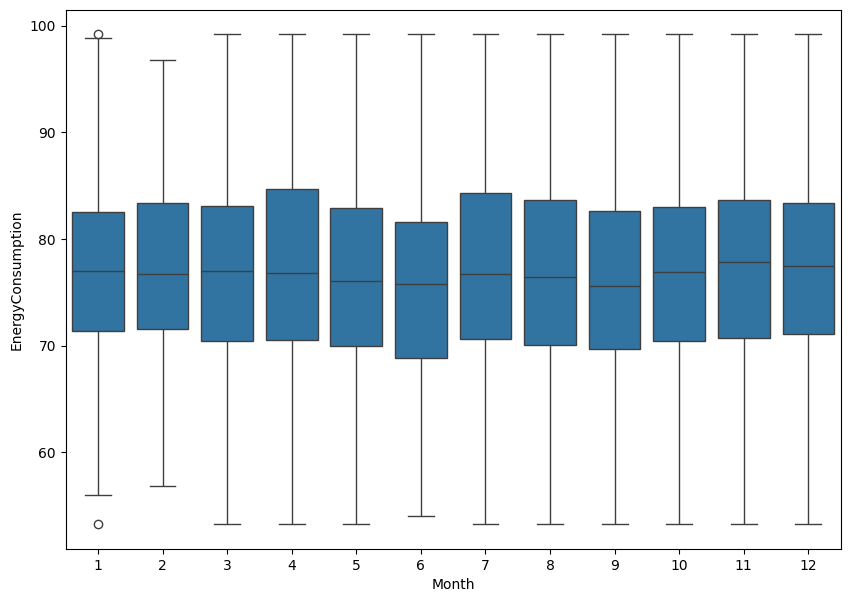

In [19]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.boxplot (x = "Month", y = "EnergyConsumption", data = data )
plt.show()

This box plot is demonstrating that month 1 is potentionally the only month with outliers compared to the rest of the months. For the purpose of this project we will be keeping these outliers and not dropping them as they are crusial to predict energy consumptions. It is only a trend to keep an eye out for. 

**Exploring explanatory variables and target variable**

The target variable would be "EnergyConsumption" and my predictors would be Square Footage. Month, Hour, DayofWeek, Temperature, Humidity and Occupancy. Following there are some investigations done on some of these exploratory columns. 

In [20]:
consumptionmean_by_month = data.groupby("Month")["EnergyConsumption"].mean().sort_values()
consumptionmean_by_month

Month
6     75.659264
9     75.897811
5     76.202260
8     76.560807
10    76.678556
1     76.945109
3     76.990937
12    77.127935
7     77.251289
11    77.341956
2     77.377782
4     77.585987
Name: EnergyConsumption, dtype: float64

Judging from the population in the dataset it looks like the month with the least energy consumption is June and the highest energy consumption month is April. 

In [21]:
occuancy_sqfootage = data.groupby(["Occupancy"])[["SquareFootage", "EnergyConsumption"]].mean().sort_values(by = "EnergyConsumption")
occuancy_sqfootage

,SquareFootage,EnergyConsumption
Occupancy,,
0,1512.761672,74.712218
1,1482.289568,75.166392
4,1540.708566,75.887569
2,1508.275765,76.101442
6,1522.818821,76.247514
3,1494.647371,76.555184
5,1483.757538,77.089554
7,1492.671646,78.220066
8,1527.335758,78.614895


But if we take another approach and judge per occupancy amount of people and square footage we can see a notably difference where energy consumption mean parameter go higher. This just demonstrates what we already knew the more people in a place the more energy consumption they use. 

**Distributions Of Feature Values**

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'SquareFootage'}>,
        <Axes: title={'center': 'Occupancy'}>],
       [<Axes: title={'center': 'RenewableEnergy'}>,
        <Axes: title={'center': 'EnergyConsumption'}>, <Axes: >]],
      dtype=object)

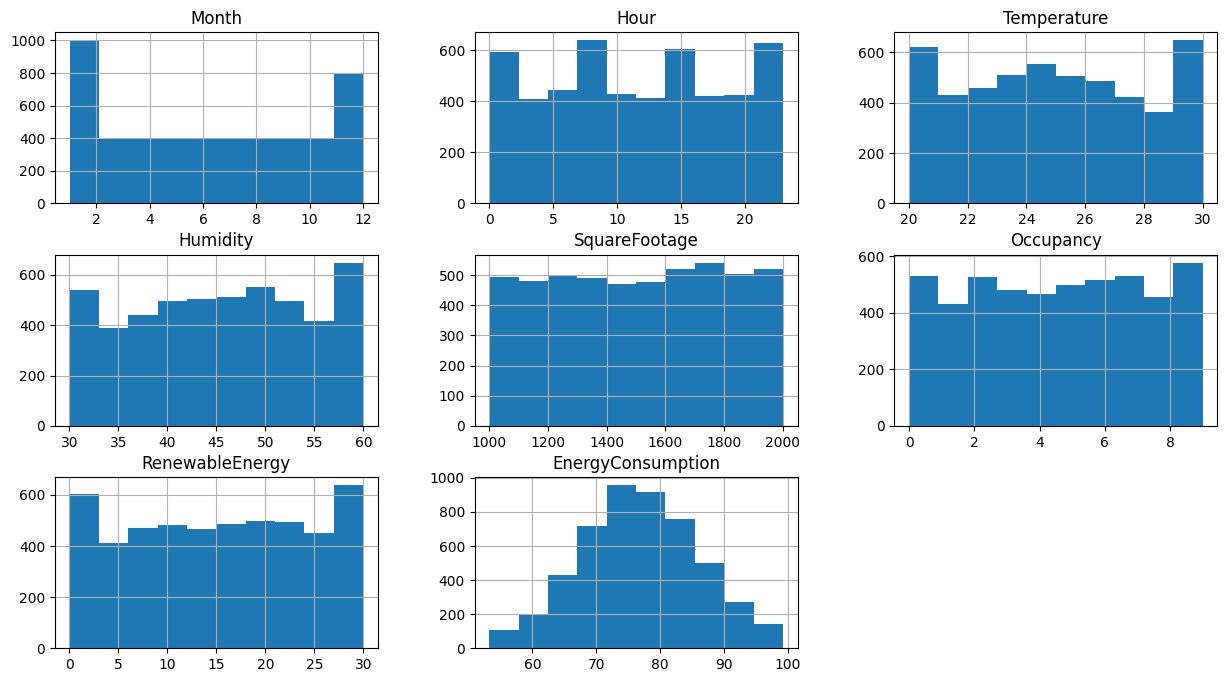

In [22]:
data.hist(figsize = (15,8))


- Here we can see that in terms of frequency in the Month histogram January and December had the most records but earlier it was found that the month with the highest mean energy consumption for Month was April. Looking into these 3 months for trends would be beneficial.
- Energy consumption is the only feature in the dataset that follows a normal distribution. This indicates that most values cluster closely around the mean, with relatively few outliers, suggesting consistent and predictable patterns in energy usage across the dataset.

# Turning boolean columns into numerical categories 

In [23]:
data[["Holiday", "HVACUsage", "LightingUsage"]].head()

,Holiday,HVACUsage,LightingUsage
0,No,On,Off
1,No,On,On
2,No,Off,Off
3,No,Off,On
4,No,On,Off


In [24]:
data["Holiday"] = data["Holiday"].map({"Yes": 1, "No": 0})


In [25]:
data["HVACUsage"]= data["HVACUsage"].map({"On": 1, "Off":0})

In [26]:
data["LightingUsage"] = data["LightingUsage"].map({"On":1, "Off": 0})

In [27]:
data.head(10)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,75.364373
1,1,1,Saturday,0,27.731651,54.225919,1411.064918,1,1,1,21.831384,83.401855
2,1,2,Saturday,0,28.704277,58.907658,1755.715009,2,0,0,6.764672,78.270888
3,1,3,Saturday,0,20.080469,50.371637,1452.316318,1,0,1,8.623447,56.519850
4,1,4,Saturday,0,23.097359,51.401421,1094.130359,9,1,0,3.071969,70.811732
5,1,5,Saturday,1,29.576037,36.824263,1871.709180,6,0,0,17.626690,84.321885
6,1,6,Saturday,1,25.131167,35.709622,1607.001228,6,1,0,24.264702,76.165791
7,1,7,Saturday,1,23.182844,31.679920,1633.955330,8,0,0,27.517099,74.131906
8,1,8,Saturday,0,25.391999,46.399364,1240.309224,6,1,0,2.307595,78.206236
9,1,9,Saturday,0,22.212549,32.418464,1705.420336,1,1,0,29.140071,77.992214


Most machine learning algorithms work better with numerical data, converting boolean-like columns like "Yes"/"No" or "On"/"Off" into numeric values (1/0) makes them easier to process.